In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
import random

In [76]:
folder = 'original'
destination = 'edited'
figsize=(6,6)

In [77]:
image_files = glob(f"{folder}/*.jpeg")

In [78]:
sample = cv2.imread(image_files[0])
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

In [79]:
def display(image):
    fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(image)
    ax.axis("off")
    plt.show()

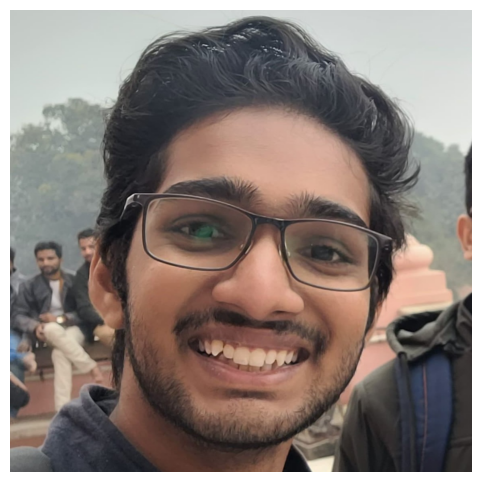

In [80]:
display(sample)

In [87]:
def show_filtered(image,kernel):
    kernel = np.array(kernel)
    image_filtered = cv2.filter2D(image,-1,kernel)

    display(image_filtered)

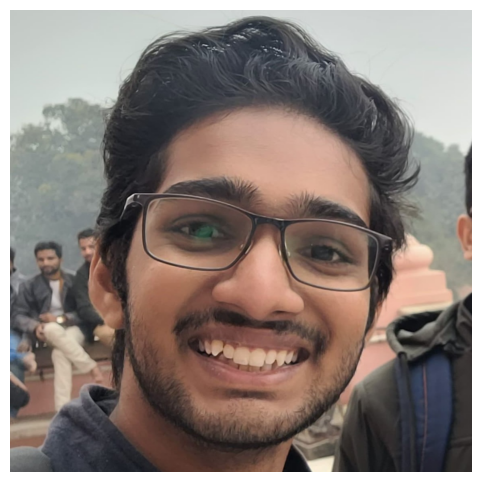

In [88]:
show_filtered(sample,
              [[0,0,0],
               [0,1,0],
               [0,0,0]])

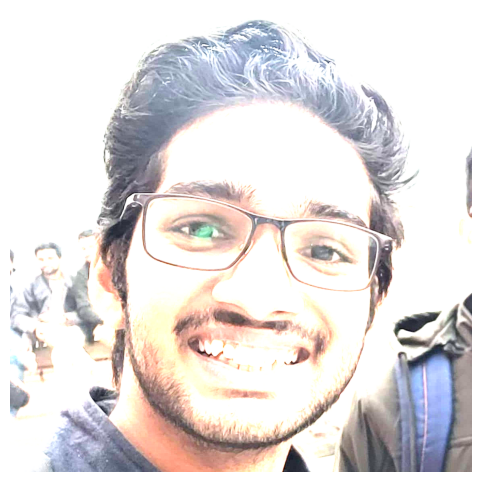

In [89]:
show_filtered(sample,
              [[0,-1,0],
               [-1,7,-1],
               [0,-1,0]])

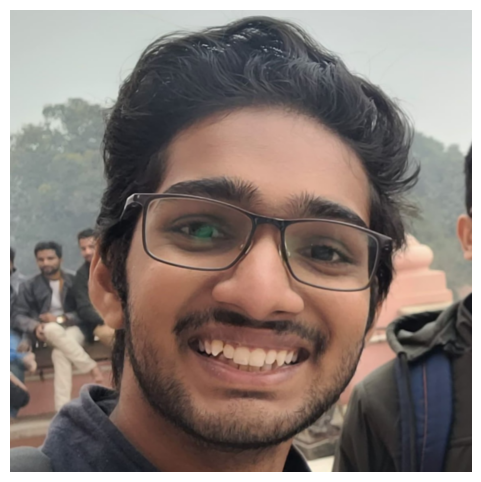

In [90]:
blur_kernel = np.ones((3,3))/9
show_filtered(sample,blur_kernel)

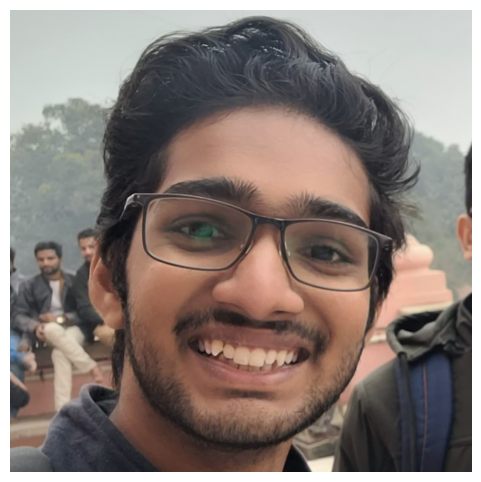

In [91]:
blur_kernel = [[1,2,1],
               [2,4,2],
               [1,2,1]]
blur_kernel = np.array(blur_kernel)/16
show_filtered(sample,blur_kernel)

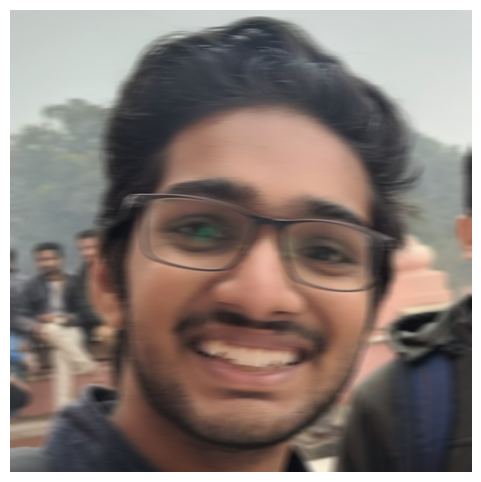

In [92]:
kernel_size = 30
  
# Create the vertical kernel. 
kernel_v = np.zeros((kernel_size, kernel_size)) 
  
# Create a copy of the same for creating the horizontal kernel. 
kernel_h = np.copy(kernel_v) 
  
# Fill the middle row with ones. 
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size) 
  
# Normalize. 
kernel_v /= kernel_size 
kernel_h /= kernel_size 

show_filtered(sample,kernel_h)

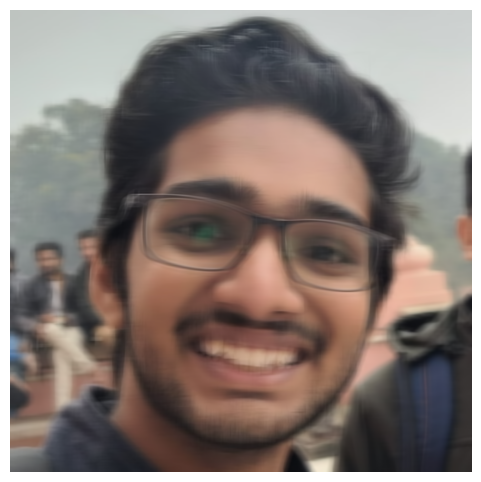

In [132]:
kernel_size = 30
  
# Create a copy of the same for creating the horizontal kernel.
kernel_both = np.zeros((kernel_size, kernel_size))

# Fill the middle row with ones. 
halfs = np.array([1/2]*kernel_size)
kernel_both[int((kernel_size - 1)/2),:] = np.ones(kernel_size)
kernel_both[:, int((kernel_size - 1)/2)] = halfs

kernel_both /= (kernel_size*1.5)

show_filtered(sample,kernel_both)

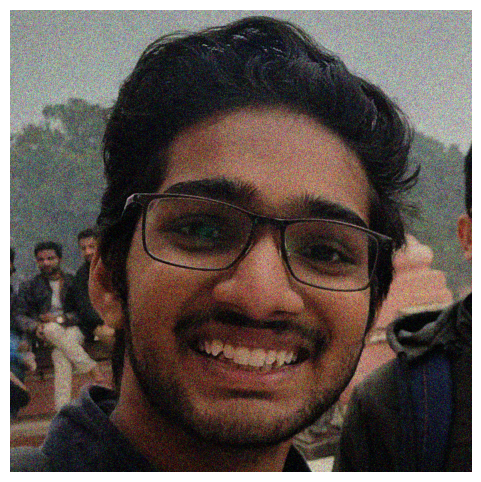

In [108]:
noise = np.random.normal(-50,50,sample.shape)
noise_sample = np.clip(noise+sample,0,255).astype(np.uint8)
display(noise_sample)

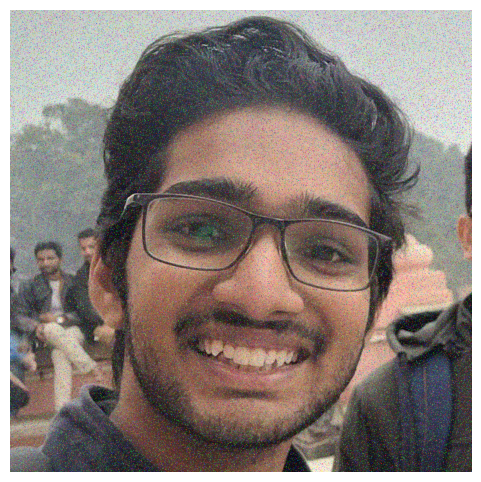

In [127]:
# Get the image size (number of pixels in the image).
img_size = sample.size

# Set the percentage of pixels that should contain noise
noise_percentage = 0.1  # Setting to 10%

# Determine the size of the noise based on the noise precentage
noise_size = int(noise_percentage*img_size)

# Randomly select indices for adding noise.
random_indices = np.random.choice(img_size, noise_size)

# Create a copy of the original image that serves as a template for the noised image.
img_noised = sample.copy()

# Create a noise list with random placements of min and max values of the image pixels.
noise = np.random.choice([sample.min(), sample.max()], noise_size)

# Replace the values of the templated noised image at random indices with the noise, to obtain the final noised image.
img_noised.flat[random_indices] = noise

display(img_noised)

In [7]:
def add_motion_blur(image,kernel_size=30):
    # kernel_size = 30
    kernel_both = np.zeros((kernel_size, kernel_size))
    halfs = np.array([1/2]*kernel_size)
    kernel_both[int((kernel_size - 1)/2),:] = np.ones(kernel_size)
    kernel_both[:, int((kernel_size - 1)/2)] = halfs
    kernel_both /= (kernel_size*1.5)
    image_filtered = cv2.filter2D(image,-1,kernel_both)
    return image_filtered

In [12]:
def add_noise(image):
    img_size = image.size
    noise_percentage = 0.1
    noise_size = int(noise_percentage*img_size)
    random_indices = np.random.choice(img_size, noise_size)
    img_noised = image.copy()
    noise = np.random.choice([image.min(), image.max()], noise_size)
    img_noised.flat[random_indices] = noise
    return img_noised

In [13]:
funcs = [add_noise,add_motion_blur]

def add_random_artefact(image):
    return funcs[np.random.randint(len(funcs))](image)

def add_all_artefacts(image):
    artefact_image = image.copy()
    for func in funcs:
        artefact_image = func(artefact_image)
    return artefact_image

def add_or_not_artefacts(image):
    s = np.random.random()
    if s<=0.25:
        return image
    elif s>0.75:
        return add_all_artefacts(image)
    else:
        return add_random_artefact(image)

In [14]:
def add_artefacts_to_directory(extension,source,destination):
    image_files = glob(f"{source}/*.{extension}")
    total = len(image_files)
    done = 0
    for image_file in image_files:
        image = cv2.imread(image_file)
        artefact_image = add_or_not_artefacts(image)
        image_file_base = os.path.basename(image_file)
        done += cv2.imwrite(os.path.join(destination,image_file_base),artefact_image)
    print(f"Total images found: {total}, Added artefacts to {done} images.")

In [15]:
add_artefacts_to_directory("jpg","images","images2")

Total images found: 133, Added artefacts to 133 images.
